### Purity, Ploidy 정보 얻어오기

In [29]:
class Clone:
    def __init__ ( self, Sample_ID, CNVcaller,  clonal, subclonal, dura_private ):
        self.Sample_ID = Sample_ID
        self.CNVcaller = CNVcaller
        self.purity = 1
        self.ploidy = 2
        self.clonal = clonal
        self.subclonal = subclonal
        self.dura_private =  dura_private
        self.clonal_ccf = 0
        self.subclonal_ccf = 0
        self.dura_private_ccf = 0
        self.clonal_no = 0
        self.subclonal_no = 0
        self.dura_private_no = 0
        self.clonal_shared_no = 0
        self.subclonal_shared_no = 0

    #def pysam_read (self, **kwargs):
        
facetcnv_220930 = Clone ( "220930", "facetcnv", [2], [1], [0] )
facetcnv_221026 = Clone ( "221026", "facetcnv", [0, 2, 4], [3], [0, 5] )
facetcnv_221102 = Clone ( "221102", "facetcnv", [2], [0], [1] )
facetcnv_221202 = Clone ( "221202", "facetcnv", [0], [1], [] )
sequenza_221202 = Clone ( "221202", "sequenza", [2], [1], [0] )
facetcnv_230127 = Clone ( "230127", "facetcnv", [0], [1, 2], [3] )
facetcnv_230323_2 = Clone ( "230303", "facetcnv", [0], [1], [2] )
facetcnv_230323_2 = Clone ( "230323_2", "facetcnv", [2], [1], [0] )
facetcnv_230405_2 = Clone ( "230405_2", "facetcnv", [1], [0], [2] )
sequenza_230405_2 = Clone ( "230405_2", "sequenza", [1], [], [0] )
facetcnv_230419 = Clone ( "230419", "facetcnv", [0], [2], [1] )
facetcnv_230526 = Clone ( "230526", "facetcnv", [2], [0], [1] )
facetcnv_230822 = Clone ( "230822", "facetcnv", [0], [2], [1] )
facetcnv_230920 = Clone ( "230920", "facetcnv", [2], [1], [0] )


In [47]:
import pandas as pd
import numpy as np

PYCLONEVI_DIR="/data/project/Meningioma/31.Clonality"
FACETCNV_DIR="/data/project/Meningioma/11.cnv/5.facetcnv"
SEQUENZA_DIR="/data/project/Meningioma/11.cnv/2.sequenza"

clone_list = [facetcnv_220930, facetcnv_221026, facetcnv_221102, sequenza_221202, facetcnv_230127, facetcnv_230323_2, sequenza_230405_2, facetcnv_230419, facetcnv_230526, facetcnv_230822]

for clone in clone_list:
    Sample_ID = clone.Sample_ID
    SEQUENZA_TO_PYCLONEVI_MATRIX_PATH = PYCLONEVI_DIR + "/01.make_matrix/" + Sample_ID + "/" + Sample_ID + ".sequenza_to_pyclonevi.tsv"
    FACETCNV_TO_PYCLONEVI_MATRIX_PATH = PYCLONEVI_DIR + "/01.make_matrix/" + Sample_ID + "/" + Sample_ID + ".facetcnv_to_pyclonevi.tsv"    
    SEQUENZA_TO_PYCLONEVI_OUTPUT_PATH = PYCLONEVI_DIR + "/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".sequenza_to_pyclonevi.tsv"
    FACETCNV_TO_PYCLONEVI_OUTPUT_PATH = PYCLONEVI_DIR + "/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".facetcnv_to_pyclonevi.tsv"
    SEQUENZA_DECOMPOSED_PATH = PYCLONEVI_DIR + "/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".decomposed-sequenza.tsv"
    FACETCNV_DECOMPOSED_PATH = PYCLONEVI_DIR + "/02.pyclonevi/" + Sample_ID + "/" + Sample_ID + ".decomposed-facetcnv.tsv"

    print ( "\n\n{}".format (Sample_ID) )
    
    for TISSUE  in ["Tumor"]:   
        SEQUENZA_MUTATION_PATH= SEQUENZA_DIR + "/hg19to38/" + Sample_ID + "_" + TISSUE + "_mutations.txt"
        SEQUENZA_SEGMENT_PATH= SEQUENZA_DIR + "/hg19to38/" + Sample_ID + "_" + TISSUE + "_segments.txt"
        SEQUENZA_PLOIDY_PATH= SEQUENZA_DIR + "/hg19/" + Sample_ID + "_" + TISSUE + "_confints_CP.txt"
        SEQUENZA_PURITY_PLOIDY_PATH= SEQUENZA_DIR + "/hg19/" + Sample_ID + "_" + TISSUE + "_purity_ploidy.txt"
        FACETCNV_OUTPUT_PATH = FACETCNV_DIR + "/" + Sample_ID + "/" + TISSUE + "/" + Sample_ID + ".vcf.gz"
        FACETCNV_PURITY_PLODY_PATH = FACETCNV_DIR + "/" + Sample_ID + "/" + TISSUE + "/" + Sample_ID + "_purity_ploidy.txt"
        FACETCNV_TO_BED_DF_PATH = PYCLONEVI_DIR + "/01.make_matrix/" + Sample_ID + "/" + Sample_ID + "_" + TISSUE + ".facetcnv_to_bed_df.tsv"


        df_sequenza_purity_ploidy = pd.read_csv (SEQUENZA_PURITY_PLOIDY_PATH , sep = "\t")
        df_facetcnv_purity_ploidy = pd.read_csv (FACETCNV_PURITY_PLODY_PATH , sep = "\t")
        clone.purity = df_facetcnv_purity_ploidy.iloc[0]["Purity"] if df_facetcnv_purity_ploidy.iloc[0]["Purity"] != 1 else df_sequenza_purity_ploidy.iloc[0]["Purity"]

        df = pd.read_csv ( FACETCNV_TO_PYCLONEVI_OUTPUT_PATH , sep = "\t") if clone.CNVcaller == "facetcnv" else pd.read_csv ( SEQUENZA_TO_PYCLONEVI_OUTPUT_PATH , sep = "\t")
        df_vaf = pd.read_csv ( FACETCNV_DECOMPOSED_PATH , sep = "\t") if clone.CNVcaller == "facetcnv" else pd.read_csv ( SEQUENZA_DECOMPOSED_PATH , sep = "\t")


        # 결과 정리
        clone.clonal_no =int ( df [ df["cluster_id"].isin (clone.clonal) ].shape[0] / 2 )
        clone.subclonal_no =int ( df [ df["cluster_id"].isin (clone.subclonal) ].shape[0] / 2 )
        clone.dura_private_no  =int ( df [ df["cluster_id"].isin (clone.dura_private ) ].shape[0] / 2 )

        clone.clonal_ccf = df [  ( df["cluster_id"].isin (clone.clonal) ) & ( df["sample_id"] == Sample_ID + "_" + TISSUE  )  ] ["cellular_prevalence"].mean() 
        clone.subclonal_ccf = df [  ( df["cluster_id"].isin (clone.subclonal) ) & ( df["sample_id"] == Sample_ID + "_" + TISSUE  )  ] ["cellular_prevalence"].mean() 

        # Clonal, Subclonal 별로 Dura VAF가 0이 아닌 것 (shared) 개수 적어주기
        df_merge = pd.merge ( df [  ( df["cluster_id"].isin (clone.clonal) ) & ( df["sample_id"] == Sample_ID + "_Dura" )  ],  df_vaf,  left_on = ["mutation_id", "sample_id"], right_on = ["mutation_id", "sample_id"] )
        clone.clonal_shared_no = df_merge [df_merge ["alt_counts"] != 0].shape[0]

        df_merge = pd.merge ( df [  ( df["cluster_id"].isin (clone.subclonal) ) & ( df["sample_id"] == Sample_ID + "_Dura" )  ],  df_vaf,  left_on = ["mutation_id", "sample_id"], right_on = ["mutation_id", "sample_id"] )
        clone.subclonal_shared_no = df_merge [df_merge ["alt_counts"] != 0].shape[0]

        print ( "clonal ccf = {}\nsubclonal ccf = {}\nclonal_no = {}\tclonal_shared_no = {}\nsubclonal_no = {}\tsubclonal_shared_no = {}".format (clone.clonal_ccf,  clone.subclonal_ccf, clone.clonal_no, clone.clonal_shared_no, clone.subclonal_no, clone.subclonal_shared_no  ))



220930
clonal ccf = 0.9701
subclonal ccf = 0.1413
clonal_no = 25	clonal_shared_no = 25
subclonal_no = 14	subclonal_shared_no = 6


221026
clonal ccf = 0.8474468749999999
subclonal ccf = 0.07559999999999999
clonal_no = 32	clonal_shared_no = 21
subclonal_no = 15	subclonal_shared_no = 2


221102
clonal ccf = 0.9895999999999999
subclonal ccf = 0.24719999999999998
clonal_no = 10	clonal_shared_no = 0
subclonal_no = 11	subclonal_shared_no = 1


221202
clonal ccf = 0.9690999999999999
subclonal ccf = 0.1485
clonal_no = 10	clonal_shared_no = 2
subclonal_no = 2	subclonal_shared_no = 0


230127
clonal ccf = 0.9658
subclonal ccf = 0.10916923076923078
clonal_no = 9	clonal_shared_no = 1
subclonal_no = 26	subclonal_shared_no = 2


230323_2
clonal ccf = 0.9533
subclonal ccf = 0.5086000000000002
clonal_no = 2	clonal_shared_no = 2
subclonal_no = 13	subclonal_shared_no = 1


230405_2
clonal ccf = 0.995
subclonal ccf = nan
clonal_no = 9	clonal_shared_no = 4
subclonal_no = 0	subclonal_shared_no = 0


2304

In [112]:
df_vis = pd.DataFrame ( columns=[ "Sample_ID", "classification", "no","shared_no", "ccf" ] )
df_vis2 = pd.DataFrame ( columns=[ "Sample_ID", "classification", "shared_contribution" ] )

for clone in clone_list:
    Sample_ID = clone.Sample_ID

    df_vis.loc[ len(df_vis.index) ] = [ Sample_ID, "clonal", clone.clonal_no, clone.clonal_shared_no, clone.clonal_ccf ]   # 맨 끝에 하나씩 추가
    df_vis.loc[ len(df_vis.index) ] = [ Sample_ID, "subclonal", clone.subclonal_no, clone.subclonal_shared_no, clone.subclonal_ccf ]   # 맨 끝에 하나씩 추가
    #df_vis.loc[ len(df_vis.index) ] = [ Sample_ID, "dura_private", clone.dura_private_no, 0, clone.dura_private_ccf ]   # 맨 끝에 하나씩 추가

    if  (clone.clonal_shared_no + clone.subclonal_shared_no) >= 3:  #221102는 Subclonal만 shared variant = 1이라서 문제가 있다
        df_vis2.loc [ len(df_vis2.index) ] = [ Sample_ID, "clonal", clone.clonal_shared_no / (clone.clonal_shared_no + clone.subclonal_shared_no) ]
        df_vis2.loc [ len(df_vis2.index) ] = [ Sample_ID, "subclonal", clone.subclonal_shared_no / (clone.clonal_shared_no + clone.subclonal_shared_no) ]

In [113]:
df_vis2

,Sample_ID,classification,shared_contribution
0,220930,clonal,0.806452
1,220930,subclonal,0.193548
2,221026,clonal,0.913043
3,221026,subclonal,0.086957
4,230127,clonal,0.333333
5,230127,subclonal,0.666667
6,230323_2,clonal,0.666667
7,230323_2,subclonal,0.333333
8,230405_2,clonal,1.000000
9,230405_2,subclonal,0.000000


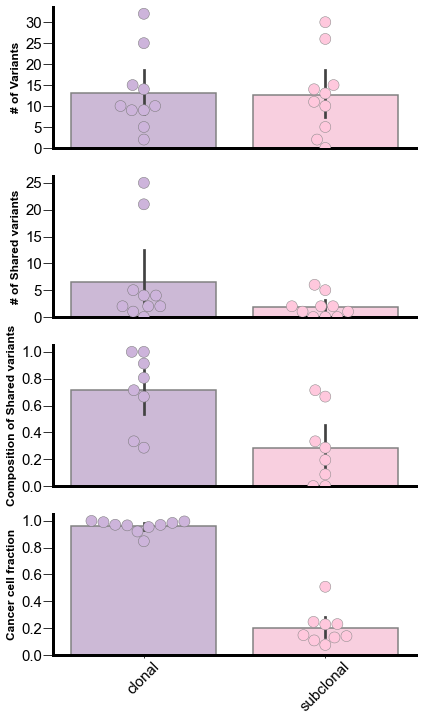

In [114]:
import palettable
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

plt.rcParams["font.family"] = 'arial'
tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

colorlist = [ "#cdb4db", "#ffc8dd", "#bde0fe"]
sns.set_palette(sns.color_palette(colorlist))


fig, ax = plt.subplots( nrows = 4, ncols = 1, figsize = (6, 12))
fig.subplots_adjust ( hspace = 0.2, bottom = 0.15, top = 0.9, left = 0.14, right = 0.98)


sns.barplot( data = df_vis, x = "classification", y = "no",
                linewidth = 1.5, edgecolor = 'gray', ax = ax[0])
sns.swarmplot( data = df_vis, x = "classification", y = "no", hue = "classification", size = 11, 
                linewidth = 0.5, edgecolor = 'gray', ax = ax[0])

sns.barplot( data = df_vis, x = "classification", y = "shared_no",
                linewidth = 1.5, edgecolor = 'gray', ax = ax[1])
sns.swarmplot( data = df_vis, x = "classification", y = "shared_no", hue = "classification", size = 11, 
                linewidth = 0.5, edgecolor = 'gray', ax = ax[1])

sns.barplot( data = df_vis2, x = "classification", y = "shared_contribution",
                linewidth = 1.5, edgecolor = 'gray', ax = ax[2])
sns.swarmplot( data = df_vis2, x = "classification", y = "shared_contribution", hue = "classification", size = 11, 
                linewidth = 0.5, edgecolor = 'gray', ax = ax[2])

sns.barplot( data = df_vis, x = "classification", y = "ccf",
                linewidth = 1.5, edgecolor = 'gray', ax = ax[3])
sns.swarmplot( data = df_vis, x = "classification", y = "ccf", hue = "classification", size = 11, 
                linewidth = 0.5, edgecolor = 'gray', ax = ax[3])


for ax_individual in [ax[0], ax[1], ax[2], ax[3]]:
    sns.despine ( top = True, right = True, ax = ax_individual )
    for axis in ['left','bottom']:
        ax_individual.spines[axis].set_linewidth( 3 )
    ax_individual.set_xlabel( None )
    if ax_individual == ax[3]:
        ax_individual.set_xticklabels ( ax_individual.get_xticklabels(), fontsize = 15, fontweight = "normal" ) 
        ax_individual.tick_params(axis='x', direction='out', length = 3, pad = 1, rotation = 45)
    else:
        ax_individual.set_xticks ( [] ) 
    ax_individual.set_yticklabels ( ax_individual.get_yticklabels(), fontsize = 15, fontweight = "normal" ) 
    ax_individual.tick_params(axis='y', direction='out', length = 10, pad = 1)
    ax_individual.get_legend().remove()

ax[0].set_ylabel( "# of Variants", fontsize = 12, fontweight = "semibold" )
ax[1].set_ylabel( "# of Shared variants", fontsize = 12, fontweight = "semibold" )
ax[2].set_ylabel( "Composition of Shared variants", fontsize = 12, fontweight = "semibold" )
ax[3].set_ylabel( "Cancer cell fraction", fontsize = 12, fontweight = "semibold" )

# ax[0].yaxis.set_label_coords( -0.11,  0.5)   # ylabel을 왼쪽으로 살짝 이동

fig.savefig ( "/data/project/Meningioma/31.Clonality/ccf_number.pdf", dpi = 300 )
